# Equations needed to build an ANN from scratch

<center> <img src = 'https://dab1nmslvvntp.cloudfront.net/wp-content/uploads/2019/10/1571317553Artificial_neural_network-1024x914.png' width = 30%>

### Cost Function
- $J = \frac{1}{n} \sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$


### Forward Propagation Equations
**1)** $Z1 = X.Wxh$        
**2)** $A1 = \sigma(Z1)$       
**3)** $Z2 = A1.Why$        
**4)** $\hat{Y} = \sigma(Z2)$

### Backpropagation Equations

- $\frac{dJ}{dW_{hy}} = \frac{dJ}{d \hat{Y}} . \frac{d \hat{Y}}{dZ_2} . \frac{dZ_2}{dW_{hy}} = [\hat{Y} - Y].[\sigma(Z_2)(1 - \sigma(Z_2))].[A1]$

- $\frac{dJ}{dW_{xh}} = \frac{dJ}{d \hat{Y}} . \frac{d \hat{Y}}{dZ_2} . \frac{dZ_2}{dA_1} . \frac{dA_1}{dZ_1} . \frac{dZ_1}{dW_{xh}} = [\hat{Y} - Y].[\sigma(Z_2)(1 - \sigma(Z_2))].[W_{hy}].[\sigma(Z_1)(1 - \sigma(Z_1))].[X]$


### Gradient Descent for Parameter Updation

- $W_{hy} = W_{hy} - \alpha \frac{dJ}{dW_{hy}}$
- $W_{xh} = W_{xh} - \alpha \frac{dJ}{dW_{xh}}$

#Building a neural network from scratch

Consider this dataset (XOR Truth Table),
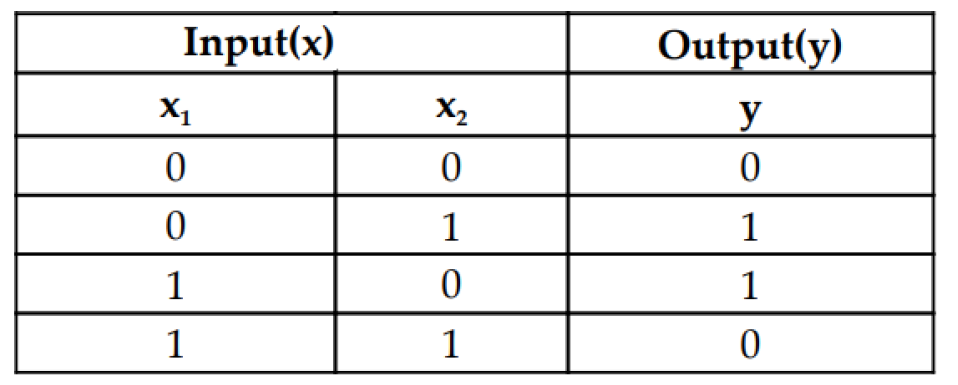

**Step 1 : Import the libraries**

In [ ]:
# Import numpy and pyplot from matplotlib
import numpy as np
import matplotlib.pyplot as plt

**Step 2: Prepare the data as shown in the preceding table**

In [ ]:
# 4 rows 2 cols for input
X = np.array([
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0]
])

# 4 rows, 1 col for output
y = np.array([
    [0],
    [0],
    [1],
    [1]
])

In [ ]:
# Print the data
print(f'X:- \n{X}\n\ny:- \n{y}')

X:- 
[[0 0]
 [1 1]
 [0 1]
 [1 0]]

y:- 
[[0]
 [0]
 [1]
 [1]]


**Step 3: Define the number of nodes in each layer**

In [ ]:
# Design the architecture
num_input = 2
num_hidden = 4
num_output = 1

**Step 4: Initialize the input to hidden layer weights**

In [ ]:
# Get same random numbers by setting same seed value
seed = 74

In [ ]:
# Define Weight matrix between input and hidden layers
np.random.seed(seed)
Wxh = np.random.randn(num_input, num_hidden)
print(f'Wxh Shape:- {Wxh.shape}')

Wxh Shape:- (2, 4)


In [ ]:
# Print Wxh Matrix
Wxh

array([[ 0.60834549, -0.63667341, -0.40887718,  0.85253229],
       [ 0.73753705, -0.59679883,  0.95365253,  1.26166632]])

**Step 5: Initialize the hidden to output layer weights**

In [ ]:
# Similarly for weifhts between hidden to output layers
np.random.seed(seed)
Why = np.random.randn(num_hidden,num_output)
Why.shape

(4, 1)

In [ ]:
# Print Why
Why

array([[ 0.60834549],
       [-0.63667341],
       [-0.40887718],
       [ 0.85253229]])

**Step 6: Define the sigmoid activation function**

In [ ]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

**Step 7: Define the derivative of the sigmoid function**

In [ ]:
def sigmoid_derivative(z):
  return sigmoid(z)*(1 - sigmoid(z))

**Step 8: Define the forward propagation**

Note:-
- `@` stands for matrix multiplication
- `*` stands for element wise multiplication

In [ ]:
def forward_prop(x,Wxh,Why):
  z1 = x @ Wxh          # [4x4] = [4x2][2x4]
  a1 = sigmoid(z1)      # [4x4]
  z2 = a1 @ Why         # [4x1] = [4x4][4x1]
  y_hat = sigmoid(z2)   # [4x1]
  return z1,a1,z2,y_hat

**Step 9: Define the backward propagation**

In [ ]:
def backword_prop(y, y_hat, z1, a1, z2):
  delta2 = (y_hat-y) * sigmoid_derivative(z2)         # [4x1] = [4x1]*[4x1]
  dJ_dWhy = a1 @ delta2                               # [4x1] = [4x4][4x1]
  delta1 = (delta2 @ Why.T) * sigmoid_derivative(z1)  # [4x4] = [4x1][1x4]*[4x4]
  dJ_dWxh = X.T @ delta1                              # [2x4] = [2x4][4x4]
  return dJ_dWxh, dJ_dWhy

**Step 10: Define the cost function**

In [ ]:
def cost_function(y, y_hat):
    return np.mean((y - y_hat)**2)

**Step 11: Set the learning rate and the number of training iterations**

In [ ]:
alpha = 0.08
epochs = 20000

**Step 12: Now, let's start training the network with the following code**

In [ ]:
cost = []

print('Training History:-')

#training
for i in range(epochs):

  # epoch
  z1,a1,z2,y_hat = forward_prop(X, Wxh, Why)
  dJ_dWxh, dJ_dWhy = backword_prop(y, y_hat, z1, a1, z2)

  #update weights
  Wxh = Wxh - alpha * dJ_dWxh
  Why = Why - alpha * dJ_dWhy

  #compute cost
  c = cost_function(y, y_hat)
  cost.append(c)

  # Print the history after 10000 epochs
  if (i+1)%1000==0:
    print(f'{i+1}/20000 : cost = {cost[i]}')

Training History:-


ValueError: operands could not be broadcast together with shapes (2,4) (4,1) 

In [ ]:
# Final Wxhy and Why
print('Wxh:-')
print(Wxh)

print()

print('Why:-')
print(Why)

Wxh:-
[[-3.99354895  3.31394958 -4.96003346 -2.83322933]
 [-2.62963982  2.36182825  2.13504884  5.18048287]]

Why:-
[[-11.77396056]
 [  4.21370761]
 [ 11.5260839 ]
 [ -9.39697659]]


**Step 13: Plot the cost function**

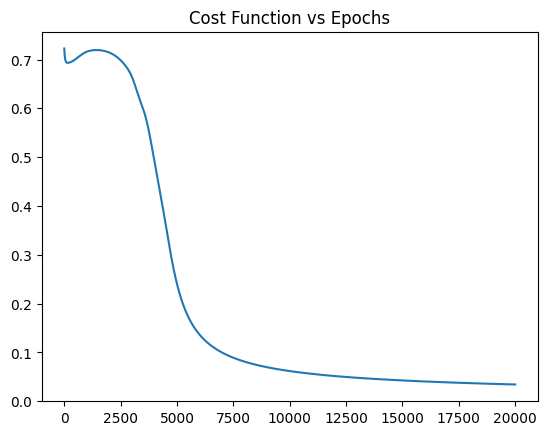

In [ ]:
# Cost Function vs Epochs
plt.plot(cost)
plt.title('Cost Function vs Epochs')
plt.show()

As you can observe from the  plot, the loss decreases over the
training iterations

**Step 14: Test the model**

In [ ]:
def predict(x1, x2, Wxh, Why):
  if (x1 != 0 and x1 != 1) or (x2 != 0 and x2 != 1):
    raise Exception(f'\nMake sure X1 and X2 cannot take any inputs other than 0 or 1.\nYou provided X1 as {X1} and X2 as {X2}')

  x_test = np.array([[x1, x2]])
  _, _, _, y_pred = forward_prop(x_test,Wxh,Why)

  if y_pred >= 0.5: # set the threshold value
    y_pred = 1
  else:
    y_pred = 0

  return y_pred

In [ ]:
# Print Intro
wlcm_msg = '| Welcome to basic ANN Predictor |'
print('-'*len(wlcm_msg))
print(wlcm_msg)
print('-'*len(wlcm_msg))
print()

# Make user input x1 and x2
print('Choose either 0 or 1 for X1 and X2 ~')
X1 = int(input("X1:- "))
X2 = int(input("X2:- "))

# Predict the output using trained model
y_pred = predict(X1, X2, Wxh, Why)
print(f'\nModel output ~\ny:- {y_pred}\n')

# Print Outro
end_msg = '| Thank You |'
print('\t', '-'*len(end_msg))
print('\t', end_msg)
print('\t', '-'*len(end_msg))

----------------------------------
| Welcome to basic ANN Predictor |
----------------------------------

Choose either 0 or 1 for X1 and X2 ~
X1:- 1
X2:- 1

Model output ~
y:- 0

	 -------------
	 | Thank You |
	 -------------


## Conclusions

1. This was a demonstration of how to build ANN from scratch to revise the concepts.
2. The dataset we used is pretty small and hence we exhausted all possiblities in training.
3. Hence, the output will always be accurate as the model has already learnt that.
4. This indeed shows that model has learnt, but the small data cannot teach model how to predict yet.
5. However, in real life we shall build ANN with dependencies like Tensorflow, Keras and PyTorch.
6. There we have enough samples to train and then to predict.